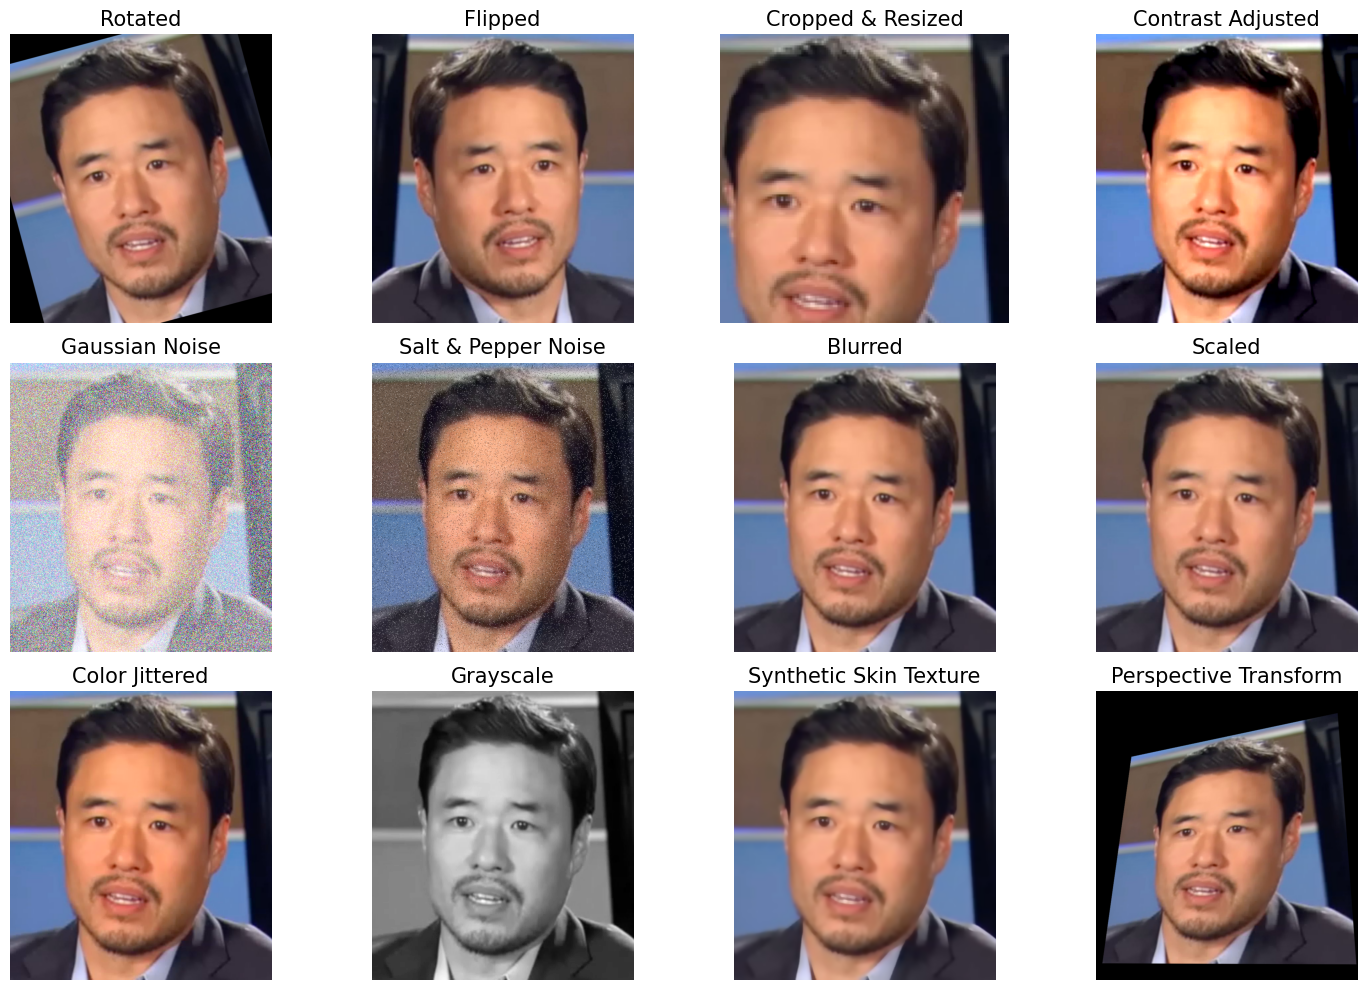

In [14]:
import cv2
import numpy as np
from PIL import Image, ImageEnhance
import random
from matplotlib import pyplot as plt

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, matrix, (w, h))

def flip_image(image):
    return cv2.flip(image, 1)  # Horizontal flip

def crop_and_resize(image, target_size):
    h, w = image.shape[:2]
    start_x = random.randint(0, w // 4)
    start_y = random.randint(0, h // 4)
    end_x = random.randint(3 * w // 4, w)
    end_y = random.randint(3 * h // 4, h)
    cropped = image[start_y:end_y, start_x:end_x]
    return cv2.resize(cropped, target_size)

def adjust_contrast(image, factor):
    pil_img = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    enhancer = ImageEnhance.Contrast(pil_img)
    img_enhanced = enhancer.enhance(factor)
    return cv2.cvtColor(np.array(img_enhanced), cv2.COLOR_RGB2BGR)

def add_gaussian_noise(image, mean=0, std=25):
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    return cv2.add(image, noise)

def add_salt_and_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    noisy = np.copy(image)
    num_salt = int(salt_prob * image.size)
    num_pepper = int(pepper_prob * image.size)

    # Salt noise
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy[coords[0], coords[1], :] = 255

    # Pepper noise
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy[coords[0], coords[1], :] = 0

    return noisy

def apply_gaussian_blur(image, kernel_size=(5, 5)):
    return cv2.GaussianBlur(image, kernel_size, 0)

def scale_image(image, scale_factor):
    h, w = image.shape[:2]
    scaled = cv2.resize(image, (int(w * scale_factor), int(h * scale_factor)))
    return cv2.resize(scaled, (w, h))

def color_jitter(image, brightness=1.0, saturation=1.0):
    pil_img = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    enhancer_brightness = ImageEnhance.Brightness(pil_img)
    enhancer_saturation = ImageEnhance.Color(pil_img)
    img_brightened = enhancer_brightness.enhance(brightness)
    img_saturated = enhancer_saturation.enhance(saturation)
    return cv2.cvtColor(np.array(img_saturated), cv2.COLOR_RGB2BGR)

def grayscale_conversion(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def synthetic_skin_texture(image):
    return cv2.bilateralFilter(image, 15, 75, 75)

def perspective_transform(image):
    h, w = image.shape[:2]

    src_points = np.float32([
        [0, 0],
        [w - 1, 0],
        [0, h - 1],
        [w - 1, h - 1]
    ])

    dst_points = np.float32([
        [random.randint(0, w // 4), random.randint(0, h // 4)],
        [random.randint(3 * w // 4, w - 1), random.randint(0, h // 4)],
        [random.randint(0, w // 4), random.randint(3 * h // 4, h - 1)],
        [random.randint(3 * w // 4, w - 1), random.randint(3 * h // 4, h - 1)]
    ])
    # Compute the perspective transform matrix
    matrix = cv2.getPerspectiveTransform(src_points, dst_points)
    # Apply the perspective transformation
    return cv2.warpPerspective(image, matrix, (w, h))

# Load and test on an image
image_path = "C:\\ML Resources\\WhatsApp Image 2024-12-11 at 01.29.30_3d746ff7.jpg"  # Replace with your image path
image = cv2.imread(image_path)

# Apply augmentations
rotated = rotate_image(image, angle=15)
flipped = flip_image(image)
cropped_resized = crop_and_resize(image, target_size=(128, 128))
contrast_adjusted = adjust_contrast(image, factor=1.5)
gaussian_noised = add_gaussian_noise(image)
salt_pepper_noised = add_salt_and_pepper_noise(image)
blurred = apply_gaussian_blur(image)
scaled = scale_image(image, scale_factor=1.2)
color_jittered = color_jitter(image, brightness=1.2, saturation=1.2)
grayscale = grayscale_conversion(image)
skin_texture = synthetic_skin_texture(image)
perspective_transformed = perspective_transform(image)

# Display results
images = [rotated, flipped, cropped_resized, contrast_adjusted, gaussian_noised, salt_pepper_noised, blurred, scaled, color_jittered, grayscale, skin_texture, perspective_transformed]
image_titles = ["Rotated", "Flipped", "Cropped & Resized", "Contrast Adjusted", "Gaussian Noise", "Salt & Pepper Noise", "Blurred", "Scaled", "Color Jittered", "Grayscale", "Synthetic Skin Texture", "Perspective Transform"]

plt.figure(figsize=(15, 10))
for i, img in enumerate(images):
    plt.subplot(3, 4, i + 1)
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(image_titles[i],fontsize=15)
    plt.axis("off")

plt.tight_layout()
plt.show()
